<a href="https://colab.research.google.com/github/nikita-sharma1/Cat_Dog_Image_Classification/blob/main/Cat_Dog_Image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [38]:
!mkdir -p ~/.Kaggle

In [39]:
ls


cat_image.jpg  dogs_vs_cats/     kaggle.json   test/
dog_image.jpg  dogs-vs-cats.zip  sample_data/  train/


In [12]:
!cp kaggle.json ~/.kaggle/

In [13]:
!kaggle datasets download -d salader/dogs-vs-cats

100% 1.06G/1.06G [00:11<00:00, 170MB/s]
100% 1.06G/1.06G [00:11<00:00, 99.7MB/s]


In [14]:
import zipfile
zip_ref=zipfile.ZipFile('/content/dogs-vs-cats.zip','r')
zip_ref.extractall('/content')
zip_ref.close()

In [40]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

In [32]:
# generators
train_ds=keras.utils.image_dataset_from_directory(
    directory='/content/train',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256,256)
)

validation_ds=keras.utils.image_dataset_from_directory(
    directory='/content/test',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [33]:
# Normalize
def process(image,label):
  image=tf.cast(image/255.,tf.float32)
  return image,label

train_ds=train_ds.map(process)
validation_ds=validation_ds.map(process)


In [34]:
# Create CNN Model
model=Sequential()

# Ist layer -> 32 filters
model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

# 2nd layer -> 64 filters
model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

# 3rd layer -> 128 filters
model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())
model.add(Dropout(0.1))
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))



In [35]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 254, 254, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 127, 127, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                      

In [36]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [37]:
history=model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 70s 107ms/step - loss: 0.9248 - accuracy: 0.6460 - val_loss: 0.6455 - val_accuracy: 0.6798
Epoch 2/10
625/625 [==============================] - 68s 109ms/step - loss: 0.5216 - accuracy: 0.7377 - val_loss: 0.4924 - val_accuracy: 0.7542
Epoch 3/10
625/625 [==============================] - 69s 109ms/step - loss: 0.4632 - accuracy: 0.7775 - val_loss: 0.5544 - val_accuracy: 0.7254
Epoch 4/10
625/625 [==============================] - 66s 106ms/step - loss: 0.4131 - accuracy: 0.8030 - val_loss: 0.5397 - val_accuracy: 0.7632
Epoch 5/10
625/625 [==============================] - 66s 105ms/step - loss: 0.3503 - accuracy: 0.8324 - val_loss: 0.5605 - val_accuracy: 0.7524
Epoch 6/10
625/625 [==============================] - 64s 102ms/step - loss: 0.2971 - accuracy: 0.8619 - val_loss: 0.5994 - val_accuracy: 0.7600
Epoch 7/10
625/625 [==============================] - 67s 106ms/step - loss: 0.2639 - accuracy: 0.8763 - val_loss: 0.5550 - val_ac

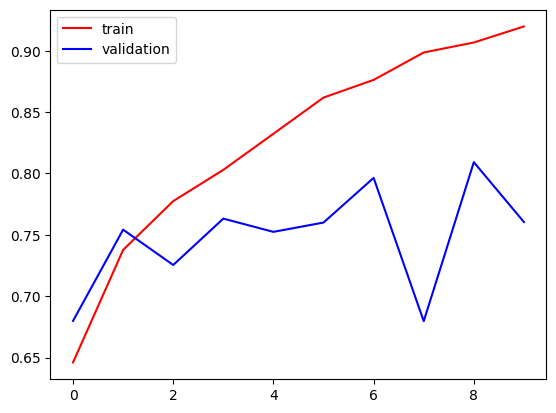

In [41]:
# Graph of Accuracy of Train and Test Data
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

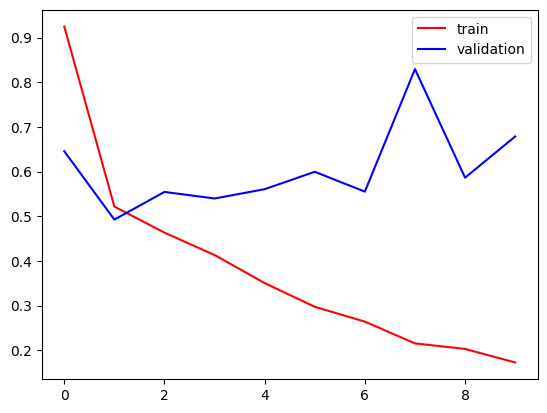

In [42]:
# Graph of Data Loss of Train and Test Data
import matplotlib.pyplot as plt
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

Our model is OverFitting so i will use BatchNormalization and Dropout to reduce Overfitting Problem


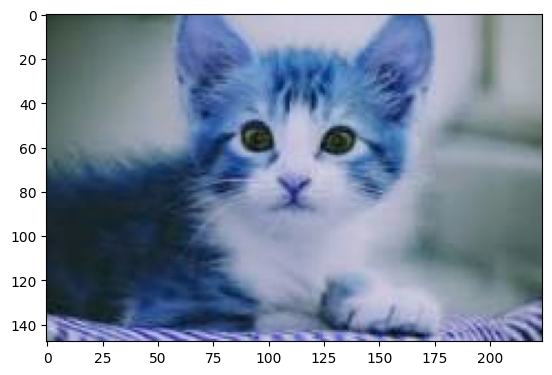

In [48]:
# Testing on new Data
import cv2
# Testing on Cat Image
test_img_cat=cv2.imread("/content/cat_image.jpg")
plt.imshow(test_img_cat)

In [49]:
test_img_cat.shape

(148, 224, 3)

In [50]:
test_img=cv2.resize(test_img_cat,(256,256))
test_input=test_img.reshape((1,256,256,3))
model.predict(test_input)

1/1 [==============================] - 0s 19ms/step


array([[2.6468927e-12]], dtype=float32)

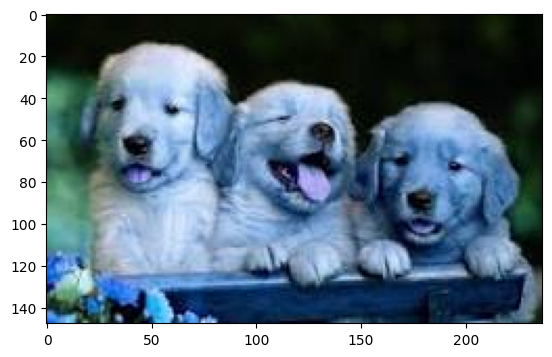

In [51]:
# Testing on Dog Image
test_img_dog=cv2.imread("/content/dog_image.jpg")
plt.imshow(test_img_dog)

In [52]:
test_img_dog.shape

(148, 237, 3)

In [55]:
test_img=cv2.resize(test_img_dog,(256,256))
test_input=test_img.reshape((1,256,256,3))
model.predict(test_input)

1/1 [==============================] - 0s 40ms/step


array([[0.]], dtype=float32)